In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/titanic.txt


<img src=https://cdn.shortpixel.ai/spai/w_425+q_lossy+ret_img+to_webp/https://www.numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png>
Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. Mainly use for data-preprocessing & data exploration. After finished pandas preprocessing, Aj.Ple really recommend to transfer data back into NumPy array format for Machine Learning Task.

# Pandas (กระบี่อยู่ที่ใจแค่ไม้ไผ่ก็ไร้เทียมทาน)

## 1. Load Data

In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv('/kaggle/input/titanic/titanic.txt', sep='\t', header = 0)
df

In [ ]:
df.head
df

## 2. Access Data & Basic Functions

In [ ]:
df.columns

In [ ]:
df['Name']

In [ ]:
df.iloc[2,0:5]

In [ ]:
df.loc[2,'Passenger Class':'Age']

In [ ]:
df.dtypes

In [ ]:
df['Age'].max()

In [ ]:
df['Age'].min()

In [ ]:
df[df['Age']==df['Age'].min()]

In [ ]:
df['Name'][df['Age']==df['Age'].max()]

In [ ]:
df.shape

In [ ]:
df['Sex'].tolist()

In [ ]:
df.values

In [ ]:
df['Label'] = df['Age'] >= 20
df

## 3. Check Missing Values

In [ ]:
df.isnull()

In [ ]:
df.isnull().any()

In [ ]:
df['Age'].isnull().sum()

In [ ]:
df['Passenger Fare'].isnull().sum()

In [ ]:
df['Cabin'].isnull().sum()

## 4. Remove Values

In [ ]:
df_clean=df
df_clean=df_clean.drop('Cabin',1)
df_clean=df_clean.drop('Ticket Number',1)
df_clean.columns

In [ ]:
df_clean=df_clean.dropna(1,'any')

In [ ]:
df_clean=df_clean.dropna(0,'any')

In [ ]:
df_clean.isnull().any()

## 5. Replace values

In [ ]:
df_clean['Sex'].unique()

In [ ]:
df_clean['Sex'] = df_clean['Sex'].replace('Female','F')
df_clean['Sex'] = df_clean['Sex'].replace('Male','M')
df_clean

## 6. Replace string values to unique integers

In [ ]:
p_class,levels=pd.factorize(df_clean['Passenger Class'])

In [ ]:
p_class

In [ ]:
levels

In [ ]:
df_clean['Passenger Class']=p_class
df_clean

In [ ]:
df_clean.dtypes

In [ ]:
df_clean['Sex']=pd.factorize(df_clean['Sex'])[0]
df_clean['Survived']=pd.factorize(df_clean['Survived'])[0]
df_clean.dtypes

# 7. Set Index

In [ ]:
df_clean=df_clean.set_index('Name')
df_clean

## 8. Cross Tab Plot

In [ ]:
pd.crosstab(df_clean['Passenger Class'],df_clean['Survived']).plot(kind='bar')

## **Ex. 1 Please load this Clinic data** from https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv and perform preprocessing as follows :
1. Set index of data to hn numbers 
2. Remove missing values 
3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo 
4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
5. Separate data into groups based on pmmet values 
6. for each group, randomly choose 10 data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/plenoi/Clinic/master/ultima_all_clean.csv', sep=',', header = 0)
df

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#1.Set index of data to hn numbers
df_clean=df
df_clean=df_clean.set_index('hn')
df_clean


,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#2.Remove missing values
df_clean.isnull()

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2633481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2634477,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2633633,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2630496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3167041,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2623351,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [7]:
df_clean.isnull().any()

age           False
parity        False
hiv            True
menopaus       True
disease       False
surgery       False
conization     True
OPDsize        True
appearance     True
stage          True
pchemo         True
Wardsize       True
finalhisto     True
nodeyiel       True
RHlvsi         True
depth          True
size           True
utmet          True
vgmargin       True
vgmet          True
pelvicme       True
pmmet          True
adnmet         True
dtype: bool

In [8]:
df_clean = df_clean.dropna(0,'any')

In [9]:
df_clean.isnull().any()

age           False
parity        False
hiv           False
menopaus      False
disease       False
surgery       False
conization    False
OPDsize       False
appearance    False
stage         False
pchemo        False
Wardsize      False
finalhisto    False
nodeyiel      False
RHlvsi        False
depth         False
size          False
utmet         False
vgmargin      False
vgmet         False
pelvicme      False
pmmet         False
adnmet        False
dtype: bool

In [10]:
df_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#3.Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo
df_clean = df_clean.drop('hiv',1)
df_clean = df_clean.drop('size',1)
df_clean = df_clean.drop('utmet',1)
df_clean = df_clean.drop('vgmet',1)
df_clean = df_clean.drop('surgery',1)
df_clean = df_clean.drop('pchemo',1)
df_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

In [12]:
#4.Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)
df_clean['age'].unique()

array([52, 32, 38, 55, 67, 47, 37, 44, 48, 39, 27, 51, 42, 40, 64, 36, 56,
       33, 46, 49, 54, 58, 31, 60, 34, 45, 41, 63, 50, 43, 30, 53, 61, 62,
       35, 69, 59, 28, 25, 57, 26, 72, 22, 68, 29, 24, 65, 71, 66, 73, 70,
       76])

In [13]:
df_clean['age'] = np.where(df_clean['age'].astype('str') > '20' ,'Old','Young')

In [14]:
df_clean['age'].unique()

array(['Old'], dtype=object)

In [15]:
df_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


In [16]:
#5.Separate data into groups based on pmmet values
df_clean['pmmet'].unique()

array([0., 1.])

In [17]:
df_group = df_clean.groupby('pmmet')
df_group

for pmmet,pmmet_df in df_group:
    print(pmmet)
    print(pmmet_df)

0.0
         age  parity  menopaus  disease  conization  OPDsize  appearance  \
hn                                                                         
2631840  Old       3       0.0        1         0.0      5.0         4.0   
2633481  Old       2       0.0        0         0.0      5.0         1.0   
2633633  Old       2       0.0        0         0.0      2.0         1.0   
2630496  Old       3       1.0        0         1.0      0.0         5.0   
2450167  Old       5       1.0        1         0.0      3.0         2.0   
...      ...     ...       ...      ...         ...      ...         ...   
3810768  Old       1       0.0        1         0.0      3.0         1.0   
3812586  Old       2       1.0        1         0.0      3.0         1.0   
3807672  Old       7       0.0        1         0.0      4.0         1.0   
3812011  Old       2       1.0        1         1.0      0.0         5.0   
3169688  Old       2       0.0        0         1.0      0.0         5.0   

       

In [18]:
df_group.get_group(0.0)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810768,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,15.0,0.0,3.0,0.0,0.0,0.0,0.0
3812586,Old,2,1.0,1,0.0,3.0,1.0,4.0,3.0,1.0,32.0,7.0,3.0,0.0,0.0,0.0,0.0
3807672,Old,7,0.0,1,0.0,4.0,1.0,4.0,4.0,2.0,17.0,1.0,3.0,0.0,0.0,0.0,0.0


In [19]:
df_group.get_group(1.0)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2635600,Old,2,0.0,0,0.0,3.0,2.0,4.0,3.0,1.0,18.0,10.0,3.0,0.0,1.0,1.0,2.0
2634755,Old,2,0.0,0,0.0,4.0,4.0,4.0,4.0,1.0,20.0,999.0,3.0,0.0,1.0,1.0,0.0
2647653,Old,1,0.0,1,0.0,6.0,1.0,5.0,6.0,1.0,14.0,5.0,3.0,0.0,1.0,1.0,0.0
2648037,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,28.0,1.0,3.0,0.0,0.0,1.0,0.0
2657353,Old,5,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,26.0,10.0,3.0,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484711,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,2.0,10.0,999.0,3.0,0.0,1.0,1.0,0.0
3810771,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,23.0,10.0,3.0,0.0,0.0,1.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0


In [20]:
#6.for each group, randomly choose 10 data

df_group.get_group(0.0).sample(n=10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3738992,Old,6,1.0,0,1.0,0.0,5.0,3.0,2.0,1.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3228154,Old,1,1.0,0,1.0,0.0,5.0,4.0,0.0,4.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
1523572,Old,1,0.0,0,1.0,0.0,5.0,1.0,0.0,2.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0
2927622,Old,2,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,27.0,0.0,2.0,0.0,0.0,0.0,0.0
3178111,Old,1,0.0,1,0.0,3.0,1.0,4.0,3.0,1.0,30.0,2.0,3.0,0.0,0.0,0.0,2.0
2639340,Old,3,0.0,0,0.0,4.0,1.0,4.0,5.0,2.0,32.0,11.0,1.0,0.0,0.0,0.0,0.0
2747952,Old,2,0.0,1,0.0,4.0,4.0,5.0,4.0,2.0,16.0,1.0,2.0,0.0,0.0,0.0,0.0
2700844,Old,1,1.0,1,0.0,0.0,5.0,4.0,0.0,3.0,19.0,1.0,2.0,0.0,0.0,0.0,0.0
3792340,Old,1,1.0,0,0.0,2.5,2.0,4.0,2.5,1.0,20.0,3.0,3.0,0.0,1.0,0.0,0.0


In [21]:
df_group.get_group(1.0).sample(n=10)

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
3467019,Old,4,0.0,1,0.0,3.0,2.0,4.0,3.0,2.0,34.0,999.0,3.0,0.0,0.0,1.0,0.0
3144244,Old,4,0.0,0,0.0,5.0,2.0,6.0,5.0,1.0,37.0,33.0,3.0,0.0,0.0,1.0,2.0
2422578,Old,0,0.0,0,0.0,4.0,1.0,4.0,3.0,1.0,21.0,999.0,3.0,0.0,1.0,1.0,1.0
2726278,Old,2,0.0,0,0.0,3.0,1.0,4.0,3.0,1.0,32.0,999.0,3.0,0.0,1.0,1.0,0.0
2859156,Old,4,0.0,0,0.0,8.0,1.0,5.0,3.0,3.0,30.0,999.0,3.0,0.0,1.0,1.0,0.0
3256981,Old,2,0.0,0,0.0,3.5,2.0,6.0,3.0,4.0,34.0,999.0,3.0,2.0,1.0,1.0,2.0
3518572,Old,2,0.0,0,1.0,3.0,1.0,6.0,3.0,1.0,30.0,2.0,3.0,0.0,1.0,1.0,0.0
3270407,Old,1,0.0,1,0.0,3.0,2.0,4.0,5.0,1.0,37.0,999.0,3.0,1.0,1.0,1.0,2.0
2902048,Old,2,0.0,0,0.0,5.0,1.0,5.0,4.0,1.0,20.0,4.0,3.0,0.0,0.0,1.0,0.0


## Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset

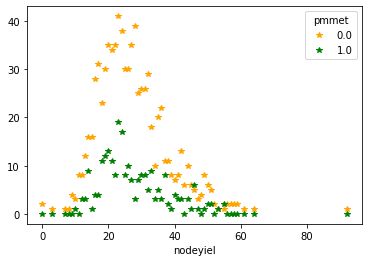

In [86]:
pd.crosstab(df_clean['nodeyiel'],df_clean['pmmet']).plot(linestyle='none',marker= "*",color = ['orange', 'green'])

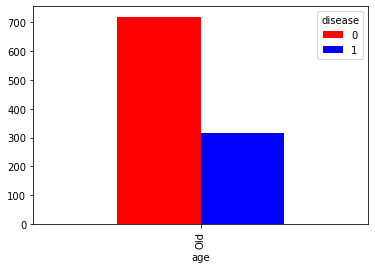

In [84]:
pd.crosstab(df_clean['age'],df_clean['disease']).plot(kind='bar',color = ['red', 'blue'])

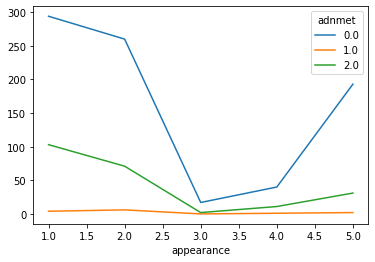

In [77]:
pd.crosstab(df_clean['appearance'],df_clean['adnmet']).plot(kind='line')

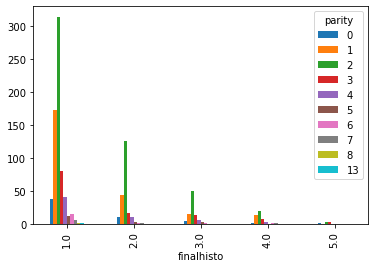

In [105]:
pd.crosstab(df_clean['finalhisto'],df_clean['parity']).plot(kind='bar')

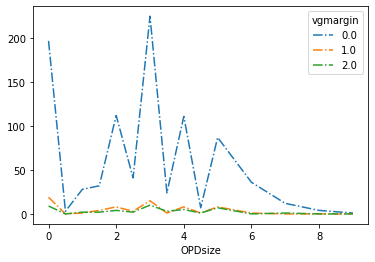

In [94]:
pd.crosstab(df_clean['OPDsize'],df_clean['vgmargin']).plot(kind='line',linestyle='dashdot')